---

# Nashville Scooter Data Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from IPython.display import display, HTML
import matplotlib.patches as mpatches

sns.set_style('white')
plt.style.use('seaborn-white')
p ={"Bird":'#882D17',
          "Gotcha":"#000000",
          "SPIN":"#FF8C00", 
          "Bolt Mobility":"#F0E68C", 
          "Lime":"#32CD32", 
          "Lyft":"#FF77FF", 
          "JUMP":"#FF4040"}

may_color = [p['Bird'], p['Lime'], p['Lyft'], p['Bolt Mobility'], p['SPIN'], p['Gotcha'],p['JUMP']]
jun_color = [p['Bird'],p['Lime'],p['Bolt Mobility'],p['Lyft'],p['SPIN'],p['Gotcha'],p['JUMP']]
jul_color = [p['Bird'],p['Bolt Mobility'],p['Lime'],p['Lyft'],p['SPIN'],p['JUMP'],p['Gotcha']]

# print(plt.style.available)

In [2]:
may_trip_df = pd.read_csv('./data_scooter/may/may_trip.csv', parse_dates=['pubTimeStamp'])
jun_trip_df = pd.read_csv('./data_scooter/june/june_trip.csv', parse_dates=['pubTimeStamp'])
jul_trip_df = pd.read_csv('./data_scooter/july/july_trip.csv', parse_dates=['pubTimeStamp'])

---

# Trip Record Data with Unmet Requirements

Per [ordinance](https://www.nashville.gov/Metro-Clerk/Legislative/Ordinances/Details/7d2cf076-b12c-4645-a118-b530577c5ee8/2015-2019/BL2018-1202.aspx), data points should have been removed if they did not meet:

 - `tripDuration` LESS THAN 1min
 - `tripDuration` MORE THAN 24hrs(1440min)
 - `tripDistance` LESS THAN 9ft(3meters)
 - invalid `sumdID` of PoweredUNKNOWN 

In [3]:
unmet_req_may = may_trip_df[(may_trip_df['tripDuration'] < 1) |
                        (may_trip_df['tripDuration'] > 1440) | 
                        (may_trip_df['tripDistance'] < 9) |
                        (may_trip_df['sumdID'] == 'PoweredUNKNOWN')]

unmet_req_jun = jun_trip_df[(jun_trip_df['tripDuration'] < 1) |
                        (jun_trip_df['tripDuration'] > 1440) | 
                        (jun_trip_df['tripDistance'] < 9) |
                        (jun_trip_df['sumdID'] == 'PoweredUNKNOWN')]

unmet_req_jul = jul_trip_df[(jul_trip_df['tripDuration'] < 1) |
                        (jul_trip_df['tripDuration'] > 1440) | 
                        (jul_trip_df['tripDistance'] < 9) |
                        (jul_trip_df['sumdID'] == 'PoweredUNKNOWN')]# .groupby(['companyName', 'tripDuration','tripDistance'])

may_trip_df_1 = may_trip_df[~may_trip_df.index.isin(unmet_req_may.index)] # filter main may_trip_df with unmet_req
jun_trip_df_1 = jun_trip_df[~jun_trip_df.index.isin(unmet_req_jun.index)]
jul_trip_df_1 = jul_trip_df[~jul_trip_df.index.isin(unmet_req_jul.index)]

print(f'May length before stripping unment requirement: {len(may_trip_df)}')
print(f'May length after stripping unment requirement: {len(may_trip_df_1)}')
print(f'June length before stripping unment requirement: {len(jun_trip_df)}')
print(f'June length after stripping unment requirement: {len(jun_trip_df_1)}')
print(f'July length before stripping unment requirement: {len(jul_trip_df)}')
print(f'July length after stripping unment requirement: {len(jul_trip_df_1)}')

May length before stripping unment requirement: 224969
May length after stripping unment requirement: 202441
June length before stripping unment requirement: 205627
June length after stripping unment requirement: 170321
July length before stripping unment requirement: 134926
July length after stripping unment requirement: 104361


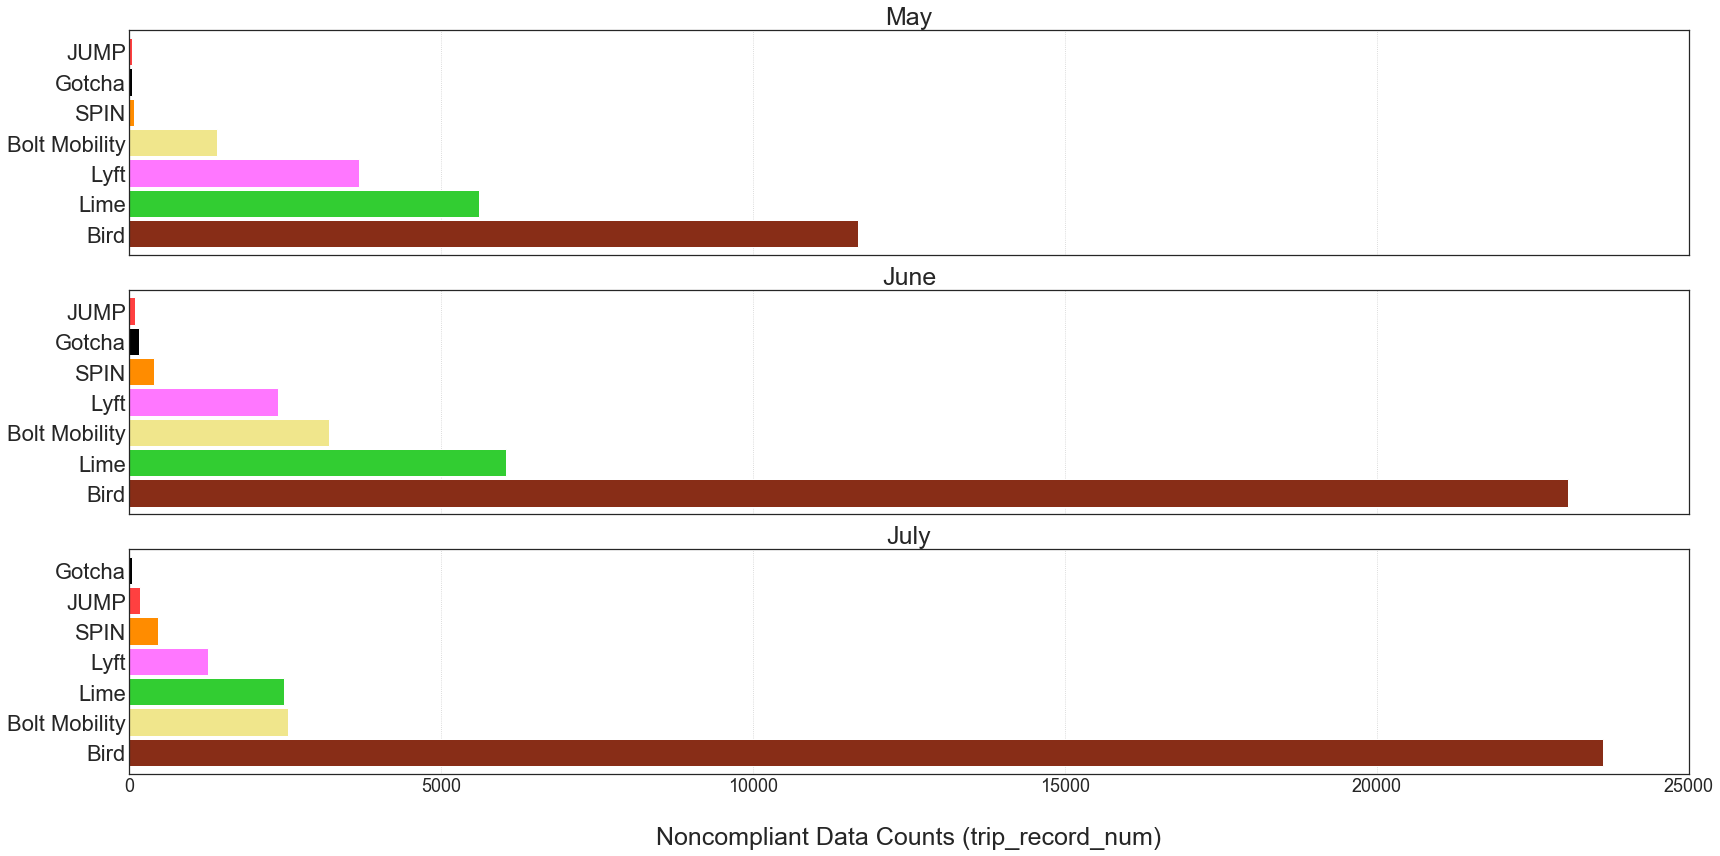

In [4]:
plt.figure(figsize=(24, 12))

####
####
plt.subplot(3, 1, 1,);
may_ax = unmet_req_may['companyName'].value_counts().plot(kind='barh',
                                             legend=False,
                                             width=0.9,
                                             color=may_color,
#                                              color='mediumseagreen',
                                             sharex=True)                            
plt.title('May', fontsize=25);
plt.yticks(fontsize=22);
plt.xlim([0, 25000]);
plt.gca().xaxis.grid(linestyle=':');

####
####
plt.subplot(3, 1, 2);
jun_ax = unmet_req_jun['companyName'].value_counts().plot(kind='barh',
                                             legend=False,
                                             width=0.9,
                                             color=jun_color,
#                                              color='lightskyblue',
                                             sharex=True);
plt.title('June', fontsize=25);
plt.yticks(fontsize=22);
plt.xlim([0, 25000]);
plt.gca().xaxis.grid(linestyle=':');

####
####
plt.subplot(3, 1, 3);
jul_ax = unmet_req_jul['companyName'].value_counts().plot(kind='barh',
                                             legend=False,
                                             width=0.9,
                                             color=jul_color,
#                                              color=july_color,
                                             sharex=True);
plt.title('July', fontsize=25);
plt.yticks(fontsize=22);
plt.xticks(fontsize=18);
plt.xlim([0, 25000]);
plt.xlabel('\nNoncompliant Data Counts (trip_record_num)', fontsize=25)

####
####
plt.gca().xaxis.grid(linestyle=':');
plt.tight_layout();
# plt.legend(handles=[jump, gotcha, spin, bolt, lyft, lime, bird],
#            bbox_to_anchor=(-.12, 2),
#            mode="expand",
#            prop={'size': 20}
#           )
plt.xlim([0, 25000]);
plt.savefig('./imgs/unmet_req')

---

# Trip Record Number Count by Hour of Day

In [5]:
trip_by_hour_may = pd.Series({i : may_trip_df_1[may_trip_df_1.pubTimeStamp.dt.hour == k]['tripRecordNum'].nunique() for i, k in enumerate(range(24))})
trip_by_hour_jun = pd.Series({i : jun_trip_df_1[jun_trip_df_1.pubTimeStamp.dt.hour == k]['tripRecordNum'].nunique() for i, k in enumerate(range(24))})
trip_by_hour_jul = pd.Series({i : jul_trip_df_1[jul_trip_df_1.pubTimeStamp.dt.hour == k]['tripRecordNum'].nunique() for i, k in enumerate(range(24))})

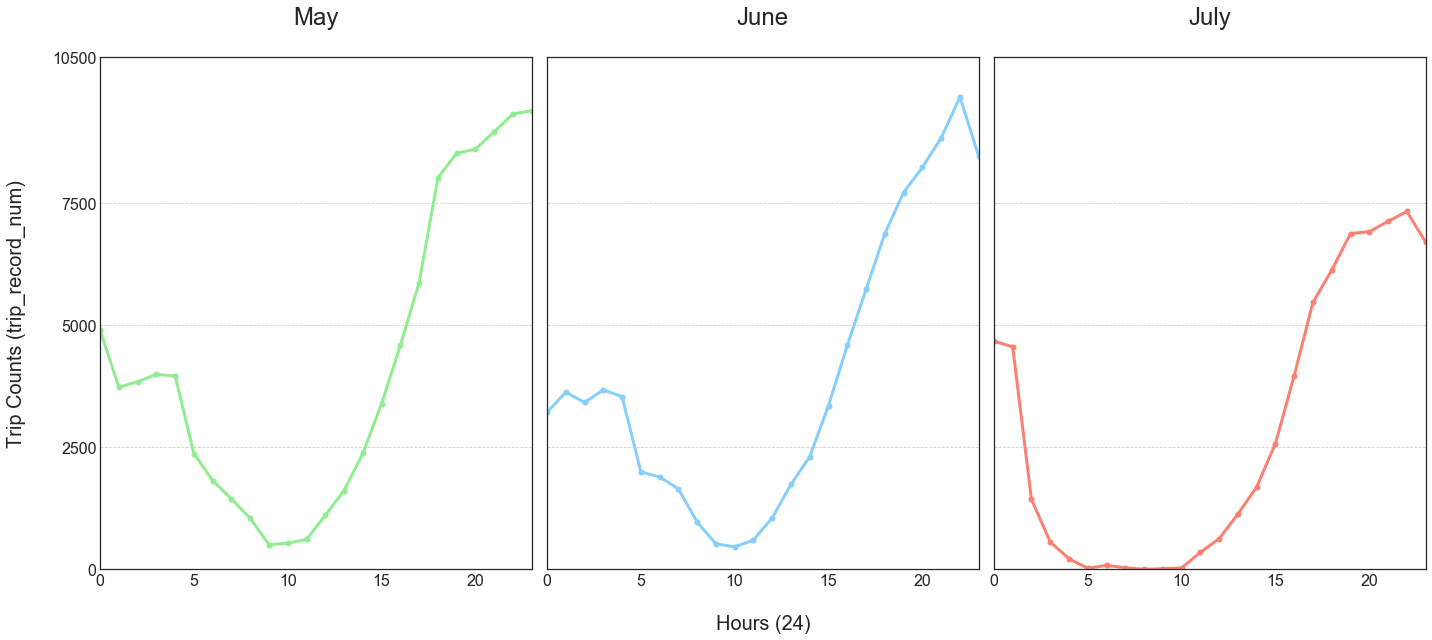

In [6]:
plt.figure(figsize=(20, 9));

####
####

plt.subplot(1, 3, 1);
trip_by_hour_may.plot(kind='line', 
                      legend=False,
                      color='lightgreen',
                      sharey=True,
                      linewidth=3,
                      markersize=10,
                      marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.gca().set_ylim([0, 10500]);
plt.title('May\n', fontsize=24);
plt.yticks([0,2500, 5000,7500, 10500],fontsize=16);
plt.xticks(fontsize=16)
# plt.ylim([1, 10500]);
plt.ylabel('Trip Counts (trip_record_num)\n', fontsize=20);

####
####


plt.subplot(1, 3, 2);
trip_by_hour_jun.plot(kind='line', 
                      legend=False,
#                       width=0.8,
                      color='lightskyblue',
                      sharey=True,
                      linewidth=3,
                      markersize=10,
                      marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.gca().set_ylim([0, 10500]);
plt.title('June\n', fontsize=24);
plt.yticks([0,2500, 5000,7500, 10500],fontsize=14);
plt.xticks(fontsize=16)
# plt.ylim([1, 10500]);
plt.xlabel('\nHours (24)', fontsize=20)

####
####

plt.subplot(1, 3, 3);
trip_by_hour_jul.plot(kind='line', 
                      legend=False,
#                       width=0.8,
                      color='salmon',
                      sharey=True,
                      linewidth=3,
                      markersize=10,
                      marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.title('July\n', fontsize=24);
plt.gca().set_ylim([0, 10500]);
# plt.ylim([1, 10500]);
plt.xticks(fontsize=16)
plt.yticks([0,2500, 5000,7500, 10500],fontsize=14);
plt.tight_layout();

plt.savefig('./imgs/hour_of_day')

---

# Trip Record Number Count by Day of Week

In [7]:
trip_by_dayofweek_may = pd.Series({i : may_trip_df_1[may_trip_df_1.pubTimeStamp.dt.dayofweek == k]['tripRecordNum'].nunique() for i, k in enumerate(range(7))});
trip_by_dayofweek_jun = pd.Series({i : jun_trip_df_1[jun_trip_df_1.pubTimeStamp.dt.dayofweek == k]['tripRecordNum'].nunique() for i, k in enumerate(range(7))});
trip_by_dayofweek_jul = pd.Series({i : jul_trip_df_1[jul_trip_df_1.pubTimeStamp.dt.dayofweek == k]['tripRecordNum'].nunique() for i, k in enumerate(range(7))});

trip_by_dayofweek_may.index = ['\n'+calendar.day_abbr[i] for i in range(7)]
trip_by_dayofweek_jun.index = ['\n'+calendar.day_abbr[i] for i in range(7)]
trip_by_dayofweek_jul.index = ['\n'+calendar.day_abbr[i] for i in range(7)]

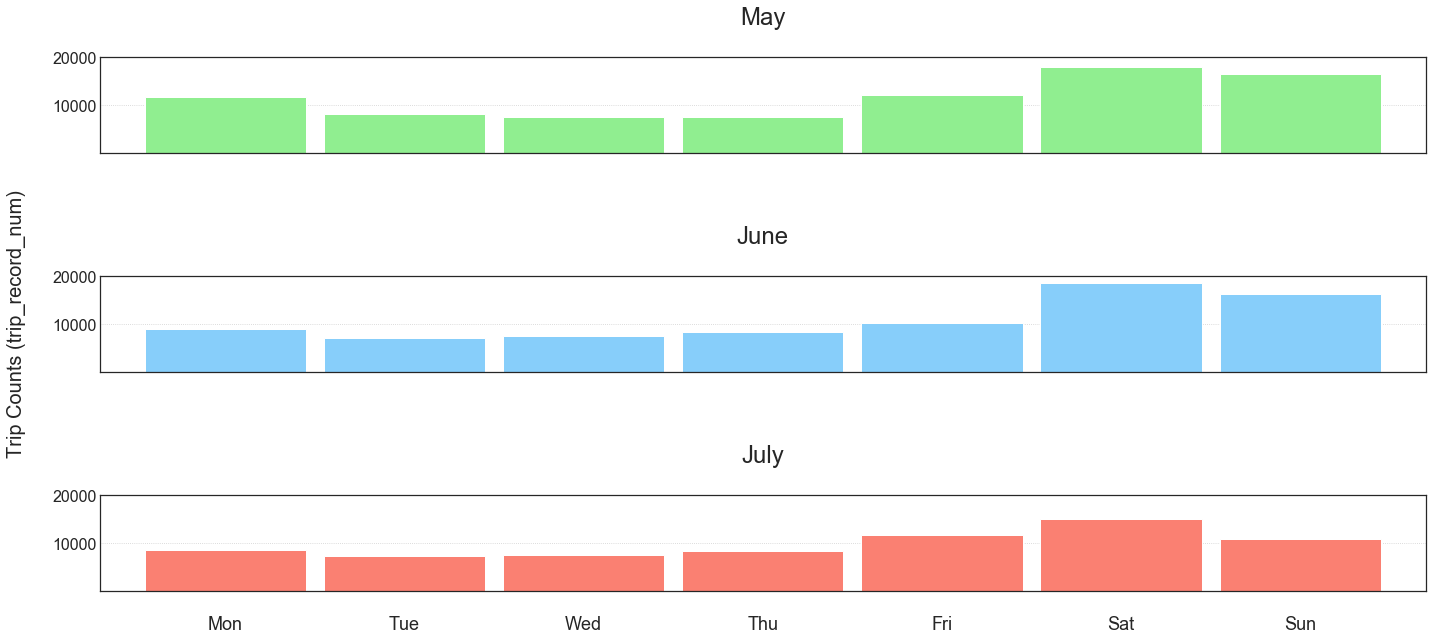

In [8]:
plt.figure(figsize=(20, 9));

####
####

plt.subplot(3, 1, 1);
trip_by_dayofweek_may.plot(kind='bar', 
                 legend=False,
                 width=0.9,
                 color='lightgreen'
);
plt.gca().yaxis.grid(linestyle=':');
plt.title('May\n', fontsize=24);
plt.xticks([]);
plt.yticks([10000, 20000],fontsize=16);

####
####

plt.subplot(3, 1, 2);
trip_by_dayofweek_jun.plot(kind='bar', 
                 legend=False,
                 width=0.9,
                 color='lightskyblue'
);
plt.gca().yaxis.grid(linestyle=':');
plt.title('June\n', fontsize=24);
plt.ylabel('Trip Counts (trip_record_num)\n', rotation=90,fontsize=20);
plt.yticks([10000, 20000],fontsize=16);
plt.xticks([]);


####
####

plt.subplot(3, 1, 3);
trip_by_dayofweek_jul.plot(kind='bar', 
                 legend=False,
                 width=0.9,
                 color='salmon'
);
plt.gca().yaxis.grid(linestyle=':');
plt.title('July\n', fontsize=24);
# plt.xticks(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=90,fontsize=14);
plt.xticks(rotation=0,fontsize=18);
plt.yticks([10000, 20000],fontsize=16);

plt.tight_layout();
plt.savefig('./imgs/day_of_week')

---

# Tip Record Number Count by Day of Month

In [9]:
trip_by_dayofmonth_may = pd.Series({i : may_trip_df_1[may_trip_df_1.pubTimeStamp.dt.day == k]['tripRecordNum'].nunique() for i, k in enumerate(range(1,32),1)});
trip_by_dayofmonth_jun = pd.Series({i : jun_trip_df_1[jun_trip_df_1.pubTimeStamp.dt.day == k]['tripRecordNum'].nunique() for i, k in enumerate(range(1,32),1)});
trip_by_dayofmonth_jul = pd.Series({i : jul_trip_df_1[jul_trip_df_1.pubTimeStamp.dt.day == k]['tripRecordNum'].nunique() for i, k in enumerate(range(1,32),1)});

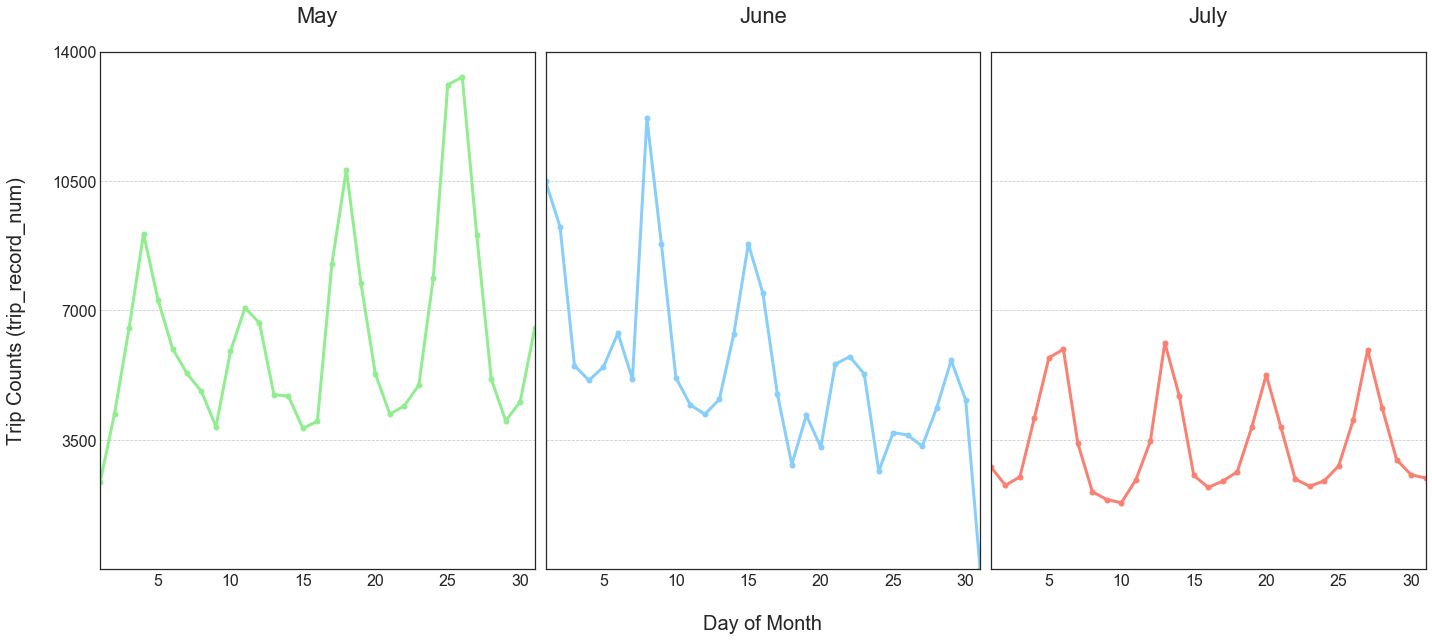

In [10]:
plt.figure(figsize=(20, 9));

####
####

plt.subplot(1, 3, 1);
trip_by_dayofmonth_may.plot(kind='line', 
                            legend=False,
                            color='lightgreen',
                            linewidth=3,
                            markersize=10,
                            marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.gca().set_ylim([0, 14000])
plt.title('May\n', fontsize=22);
plt.yticks([3500, 7000, 10500, 14000], fontsize=16);
plt.xticks(fontsize=16);
plt.ylabel('Trip Counts (trip_record_num)\n', fontsize=20);

####
####

plt.subplot(1, 3, 2);
trip_by_dayofmonth_jun.plot(kind='line', 
                            legend=False,
                            color='lightskyblue',
                            sharey=True,
                            linewidth=3,
                            markersize=10,
                            marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.gca().set_ylim([0, 14000])
plt.title('June\n', fontsize=22);
plt.yticks([3500, 7000, 10500, 14000], fontsize=16);
plt.xticks(fontsize=16);
plt.xlabel('\nDay of Month', fontsize=20);

####
####

plt.subplot(1, 3, 3);
trip_by_dayofmonth_jul.plot(kind='line', 
                            legend=False,
                            color='salmon',
                            sharey=True,
                            linewidth=3,
                            markersize=10,
                            marker='.');

plt.gca().yaxis.grid(linestyle='--');
plt.gca().set_ylim([0, 14000])
plt.title('July\n', fontsize=22);
plt.yticks([3500, 7000, 10500, 14000], fontsize=16);
plt.xticks(fontsize=16);
plt.tight_layout();

plt.savefig('./imgs/day_of_month')